# Customer Service Requests Analysis
### Contributor: Shirsendu Koner
### Objective: Perform data preprocessing and exploratory data analysis (EDA) to derive insights from the dataset.
### Tools: NumPy, Pandas, Matplotlib, Seaborn, SciPy
---

## Introduction
This project aims to analyze NYC 311 service request data to identify trends in complaints and services.
The dataset contains millions of records of service requests made by NYC residents from 2010 to the present. The objective is to uncover patterns in the data and derive actionable insights.
---

### Step 1: Import Necessary Libraries
We will start by importing the libraries needed for data analysis and visualization.

In [1]:
# Importing required libraries for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import chi2_contingency, chi2

# Setting up inline plotting in notebooks
%matplotlib inline


### Step 2: Loading the Dataset
We load the NYC 311 service requests dataset from the specified path. The `low_memory=False` parameter ensures that pandas reads the large dataset without datatype issues.


In [2]:
# Loading the dataset
# Ensure that the correct file path is used and handle potential file errors.
try:
    dataset_path = './Dataset/Service_Requests_from_2010_to_Present.csv'
    dataset = pd.read_csv(dataset_path, low_memory=False)
    print("Dataset loaded successfully!")
except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Dataset loaded successfully!


### Step 3: Data Inspection
Inspecting the dataset to understand its structure, size, and the first few records.

In [3]:
# Step 3: Initial Exploration
# Displaying the first 5 rows of the dataset to understand its structure
print("Dataset Preview:")
print(dataset.head())

Dataset Preview:
   Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   
3    32305098  12/31/2015 11:57:46 PM  01-01-16 7:43   NYPD   
4    32306529  12/31/2015 11:56:58 PM  01-01-16 3:24   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Ac

In [4]:
# Checking the shape of the dataset (number of rows and columns)
print(f"\nDataset Shape: {dataset.shape}")


Dataset Shape: (300698, 53)


In [5]:
# Display a concise summary of the dataset, showing data types and non-null counts
print("\nDataset Info:")
dataset.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  C

In [6]:
# Step 4: Dropping Irrelevant and Null-Heavy Columns
# This step removes columns that contain excessive null values or are not relevant to the analysis.
drop_columns = [
    'Agency Name', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 
    'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'Park Facility Name', 
    'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code', 
    'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 
    'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 
    'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 
    'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 
    'Landmark', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Due Date', 
    'Resolution Action Updated Date', 'Community Board', 'Facility Type', 'Location'
]

In [7]:
# Dropping unnecessary columns
dataset = dataset.drop(columns=drop_columns)

# Step 5: Verify the new dataset shape after dropping columns
print(f"\nUpdated Dataset Shape: {dataset.shape}")


Updated Dataset Shape: (300698, 14)


In [8]:
# Step 6: Checking for missing data in the remaining columns
print("\nNull Values in Each Column:")
print(dataset.isnull().sum())


Null Values in Each Column:
Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
dtype: int64


In [9]:
# Step 7: Review of the updated dataset
print("\nUpdated Dataset Info:")
dataset.info()



Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              300698 non-null  int64  
 1   Created Date            300698 non-null  object 
 2   Closed Date             298534 non-null  object 
 3   Agency                  300698 non-null  object 
 4   Complaint Type          300698 non-null  object 
 5   Descriptor              294784 non-null  object 
 6   Location Type           300567 non-null  object 
 7   Incident Zip            298083 non-null  float64
 8   City                    298084 non-null  object 
 9   Status                  300698 non-null  object 
 10  Resolution Description  300698 non-null  object 
 11  Borough                 300698 non-null  object 
 12  Latitude                297158 non-null  float64
 13  Longitude               297158 non-null  float64
dt

In [10]:
# Step 8: Next Steps
# - Handle missing data appropriately (e.g., imputation or removal)
# - Convert date columns ('Created Date', 'Closed Date') to datetime format for analysis
# - Perform exploratory data analysis (EDA) to find trends, patterns, and anomalies

In [11]:
# Step 9: Filtering for Closed Cases Only
# We only want to focus on cases where the status is "Closed" to eliminate null values in certain columns.
dataset = dataset[dataset['Status'] == 'Closed']

In [12]:
# Rechecking for null values after filtering for closed cases
print("\nNull Values After Filtering for Closed Cases:")
print(dataset.isnull().sum())


Null Values After Filtering for Closed Cases:
Unique Key                   0
Created Date                 0
Closed Date                  0
Agency                       0
Complaint Type               0
Descriptor                5903
Location Type               65
Incident Zip               507
City                       506
Status                       0
Resolution Description       0
Borough                      0
Latitude                  1432
Longitude                 1432
dtype: int64


In [13]:
# Step 10: Dropping the 'Status' Column
# Since all remaining cases have the status 'Closed', the 'Status' column is redundant and can be dropped.
dataset = dataset.drop(columns=['Status'])

In [14]:
# Verifying the new shape of the dataset after dropping 'Status'
print(f"\nDataset Shape After Dropping 'Status' Column: {dataset.shape}")


Dataset Shape After Dropping 'Status' Column: (298471, 13)


In [15]:
# Step 11: Handling Null Values in Important Columns
# The columns 'Descriptor', 'Latitude', and 'Longitude' still contain a significant amount of null values.
# We will drop rows where these columns have null values to ensure a clean dataset for analysis.
dataset = dataset[(dataset['Descriptor'].notnull()) & (dataset['Latitude'].notnull()) & (dataset['Longitude'].notnull())]

In [16]:
# Checking the dataset structure after removing null values in 'Descriptor', 'Latitude', and 'Longitude'
print("\nDataset Info After Removing Nulls in 'Descriptor', 'Latitude', and 'Longitude':")
dataset.info()


Dataset Info After Removing Nulls in 'Descriptor', 'Latitude', and 'Longitude':
<class 'pandas.core.frame.DataFrame'>
Index: 291204 entries, 0 to 300697
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              291204 non-null  int64  
 1   Created Date            291204 non-null  object 
 2   Closed Date             291204 non-null  object 
 3   Agency                  291204 non-null  object 
 4   Complaint Type          291204 non-null  object 
 5   Descriptor              291204 non-null  object 
 6   Location Type           291149 non-null  object 
 7   Incident Zip            291164 non-null  float64
 8   City                    291164 non-null  object 
 9   Resolution Description  291204 non-null  object 
 10  Borough                 291204 non-null  object 
 11  Latitude                291204 non-null  float64
 12  Longitude               291204 non-null  float64
dty

In [17]:
# Step 12: Removing Remaining Null Values
# A few null values still remain in other columns, specifically 'Location Type', 'Incident Zip', and 'City'.
# We will now remove these remaining null values to have a clean dataset.
dataset = dataset[(dataset['Location Type'].notnull()) & (dataset['Incident Zip'].notnull()) & (dataset['City'].notnull())]

In [18]:
# Rechecking for any remaining null values in the dataset
print("\nFinal Check for Null Values After Cleaning:")
print(dataset.isnull().sum())


Final Check for Null Values After Cleaning:
Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
dtype: int64


In [19]:
# Verifying the final shape of the cleaned dataset
print(f"\nFinal Dataset Shape After Cleaning: {dataset.shape}")


Final Dataset Shape After Cleaning: (291107, 13)


# 2. Convert 'Created Date' and 'Closed Date' to datetime datatype
# We will convert the 'Created Date' and 'Closed Date' columns to the appropriate datetime format for further analysis.

In [20]:
cols = ['Created Date', 'Closed Date']
for col in cols:
    dataset[col] = pd.to_datetime(dataset[col], infer_datetime_format=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_14196\3317129896.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset[col] = pd.to_datetime(dataset[col], infer_datetime_format=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_14196\3317129896.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset[col] = pd.to_datetime(dataset[col], infer_datetime_format=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_14196\3317129896.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-date

In [21]:
# Create a new column 'Request_Closing_Time' to store the time elapsed between request creation and closure
dataset['Request_Closing_Time'] = dataset['Closed Date'] - dataset['Created Date']

# Display the updated info to ensure 'Created Date', 'Closed Date' are now datetime and 'Request_Closing_Time' is timedelta
print("\nDataset Info After Converting Dates and Adding 'Request_Closing_Time':")
dataset.info()


Dataset Info After Converting Dates and Adding 'Request_Closing_Time':
<class 'pandas.core.frame.DataFrame'>
Index: 291107 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              291107 non-null  int64          
 1   Created Date            291107 non-null  datetime64[ns] 
 2   Closed Date             291107 non-null  datetime64[ns] 
 3   Agency                  291107 non-null  object         
 4   Complaint Type          291107 non-null  object         
 5   Descriptor              291107 non-null  object         
 6   Location Type           291107 non-null  object         
 7   Incident Zip            291107 non-null  float64        
 8   City                    291107 non-null  object         
 9   Resolution Description  291107 non-null  object         
 10  Borough                 291107 non-null  object         
 11  Latitude   

# 3. Generating Insights with Visuals
# Let's analyze the dataset by looking at the most common complaint types, descriptors, and boroughs.

In [22]:
# Applying describe() to get a summary of the dataset
print("\nDataset Summary Statistics:")
print(dataset.describe())


Dataset Summary Statistics:
         Unique Key                   Created Date  \
count  2.911070e+05                         291107   
mean   3.130158e+07  2015-08-14 11:25:43.378747648   
min    3.027948e+07            2015-03-29 00:33:01   
25%    3.079934e+07            2015-06-08 15:38:00   
50%    3.130675e+07            2015-08-13 22:57:41   
75%    3.179091e+07     2015-10-19 15:03:16.500000   
max    3.231065e+07            2015-12-31 23:59:45   
std    5.753777e+05                            NaN   

                         Closed Date   Incident Zip       Latitude  \
count                         291107  291107.000000  291107.000000   
mean   2015-08-14 15:44:15.511413248   10857.977349      40.725681   
min              2015-03-29 00:57:23      83.000000      40.499135   
25%              2015-06-08 21:25:00   10314.000000      40.668926   
50%              2015-08-14 02:50:57   11209.000000      40.717782   
75%       2015-10-19 20:58:35.500000   11238.000000      40.7829

In [23]:
# Viewing the available columns for further analysis
print("\nDataset Columns:")
print(dataset.columns)


Dataset Columns:
Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')


# Analyzing and visualizing the distribution of complaints


In [24]:
# Complaint Types: Count and Bar Plot
complaint_type_counts = dataset['Complaint Type'].value_counts()
print("\nTop Complaint Types:")
print(complaint_type_counts)


Top Complaint Types:
Complaint Type
Blocked Driveway            76676
Illegal Parking             74021
Noise - Street/Sidewalk     47747
Noise - Commercial          35144
Derelict Vehicle            17506
Noise - Vehicle             16868
Animal Abuse                 7744
Traffic                      4466
Noise - Park                 3927
Vending                      3773
Drinking                     1270
Noise - House of Worship      920
Posting Advertisement         647
Disorderly Youth              285
Graffiti                      113
Name: count, dtype: int64


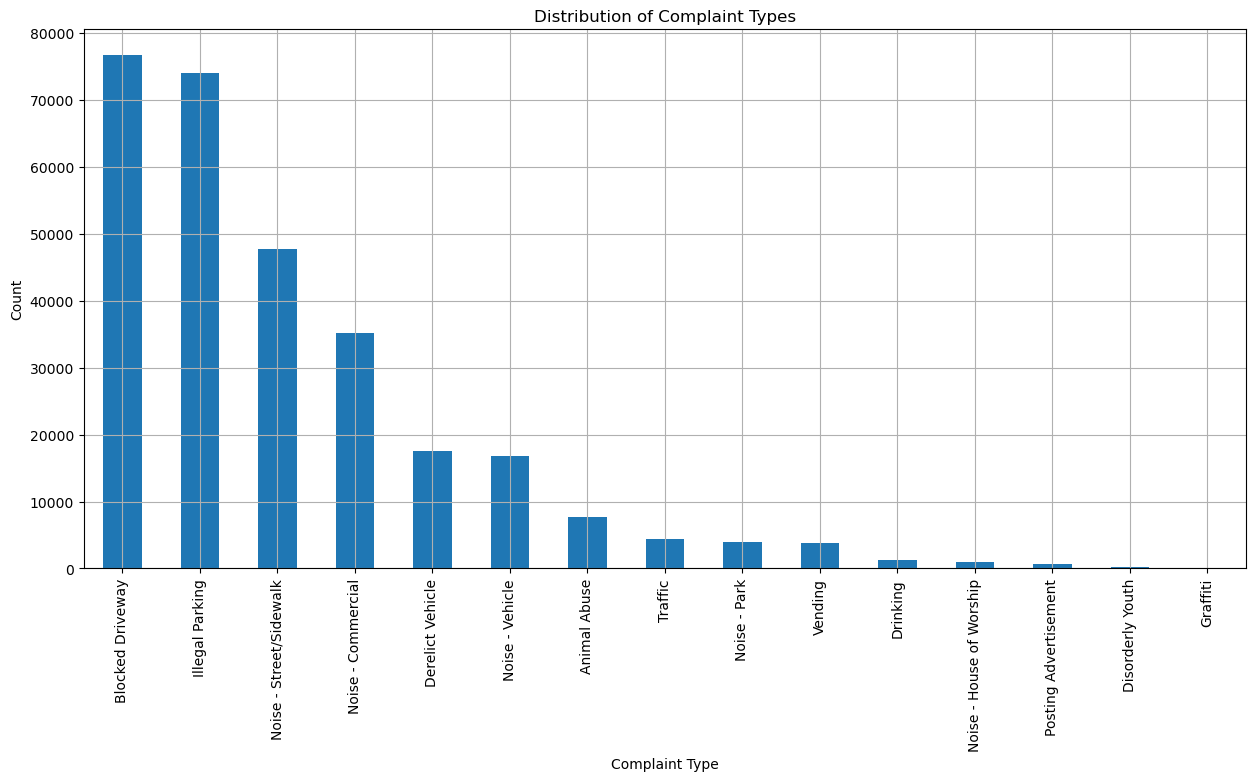

In [25]:
# Plotting the distribution of complaint types
complaint_type_counts.plot(kind='bar', figsize=(15, 7), title='Distribution of Complaint Types', ylabel='Count', grid=True)
plt.show()

In [26]:
# Descriptors: Count and Bar Plot
descriptor_counts = dataset['Descriptor'].value_counts()
print("\nTop Descriptors:")
print(descriptor_counts)


Top Descriptors:
Descriptor
Loud Music/Party                  60444
No Access                         56725
Posted Parking Sign Violation     22103
Loud Talking                      21254
Partial Access                    19951
With License Plate                17506
Blocked Hydrant                   15837
Commercial Overnight Parking      11908
Car/Truck Music                   11114
Blocked Sidewalk                  10930
Double Parked Blocking Traffic     5558
Double Parked Blocking Vehicle     4147
Engine Idling                      4134
Banging/Pounding                   4090
Neglected                          3771
Car/Truck Horn                     3477
Congestion/Gridlock                2736
In Prohibited Area                 2017
Other (complaint details)          1961
Unlicensed                         1756
Overnight Commercial Storage       1746
Unauthorized Bus Layover           1333
Truck Route Violation              1010
In Public                           923
Tortured   

# Plotting top 10 descriptors

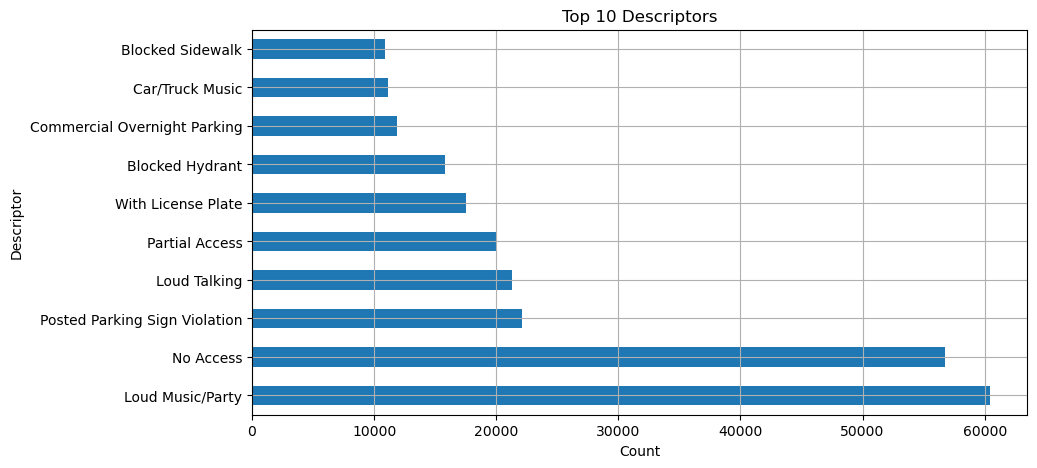

In [27]:
descriptor_counts.head(10).plot(kind='barh', figsize=(10, 5), title='Top 10 Descriptors', grid=True)
plt.xlabel('Count')
plt.ylabel('Descriptor')
plt.show()

In [28]:
# Location Type: Count and Bar Plot
location_type_counts = dataset['Location Type'].value_counts()
print("\nTop Location Types:")
print(location_type_counts.head(10))


Top Location Types:
Location Type
Street/Sidewalk               242765
Store/Commercial               19425
Club/Bar/Restaurant            17172
Residential Building/House      5753
Park/Playground                 4246
House of Worship                 920
Residential Building             226
Highway                          196
Parking Lot                      116
House and Store                   93
Name: count, dtype: int64


# Plotting the top 10 location types


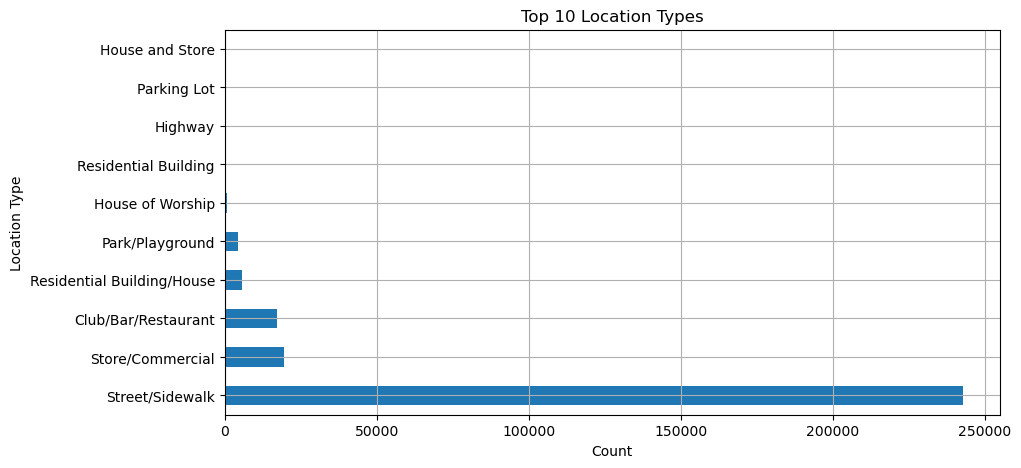

In [29]:
location_type_counts.head(10).plot(kind='barh', figsize=(10, 5), title='Top 10 Location Types', grid=True)
plt.xlabel('Count')
plt.ylabel('Location Type')
plt.show()

In [30]:
# City: Count and Bar Plot
city_counts = dataset['City'].value_counts()
print("\nTop 10 Cities with Most Complaints:")
print(city_counts.head(10))


Top 10 Cities with Most Complaints:
City
BROOKLYN         96858
NEW YORK         61935
BRONX            40216
STATEN ISLAND    12211
JAMAICA           7155
ASTORIA           6254
FLUSHING          5916
RIDGEWOOD         5124
CORONA            4265
WOODSIDE          3493
Name: count, dtype: int64


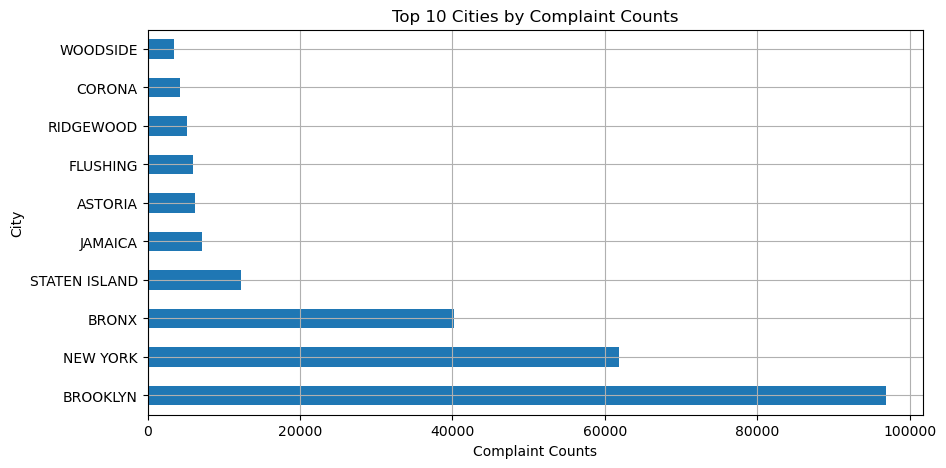

In [31]:
# Plotting the top 10 cities with the most complaints
city_counts.head(10).plot(kind='barh', figsize=(10, 5), title='Top 10 Cities by Complaint Counts', grid=True)
plt.xlabel('Complaint Counts')
plt.ylabel('City')
plt.show()

In [32]:
# Borough: Count and Bar Plot
borough_counts = dataset['Borough'].value_counts()
print("\nTop Boroughs with Most Complaints:")
print(borough_counts)


Top Boroughs with Most Complaints:
Borough
BROOKLYN         96858
QUEENS           79790
MANHATTAN        62033
BRONX            40217
STATEN ISLAND    12209
Name: count, dtype: int64


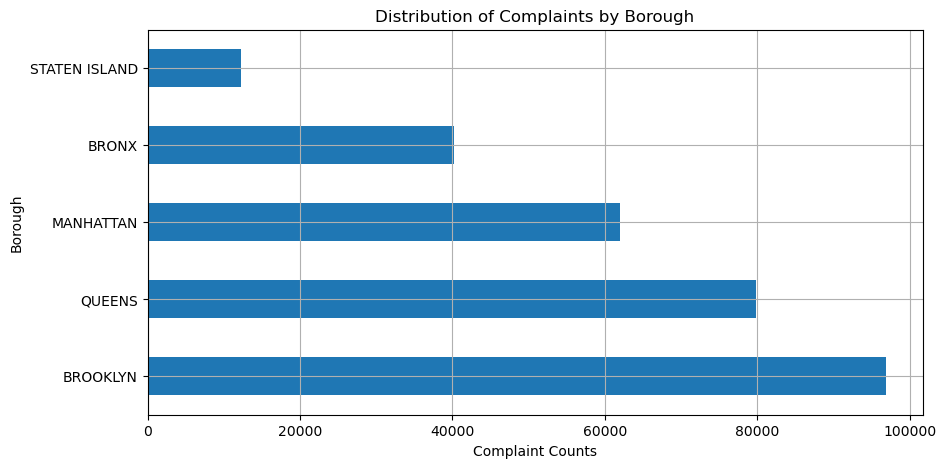

In [33]:
# Plotting the distribution of complaints by borough
borough_counts.plot(kind='barh', figsize=(10, 5), title='Distribution of Complaints by Borough', grid=True)
plt.xlabel('Complaint Counts')
plt.ylabel('Borough')
plt.show()

In [34]:
# Borough and Complaint Types Analysis
# Let's take the top 6 most common complaint types and analyze their distribution across different boroughs.

# Extract the top 6 most common complaint types
top_6_complaints = dataset['Complaint Type'].value_counts().head(6).index
print("\nTop 6 Complaint Types:")
print(top_6_complaints)


Top 6 Complaint Types:
Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle'],
      dtype='object', name='Complaint Type')


In [35]:
# Analyzing the number of complaints per borough for each of the top 6 complaint types
borough_complaints = dataset.groupby(['Borough', 'Complaint Type']).size().unstack().fillna(0)

# Filter to keep only the top 6 complaints
borough_complaints = borough_complaints[top_6_complaints]
borough_complaints

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle
Borough,,,,,,
BRONX,12740,7829,8864,2431,1948,3385
BROOKLYN,28119,27386,13315,11451,5164,5145
MANHATTAN,2055,11981,20362,14528,530,5374
QUEENS,31621,21944,4391,6057,8102,2608
STATEN ISLAND,2141,4881,815,677,1762,356


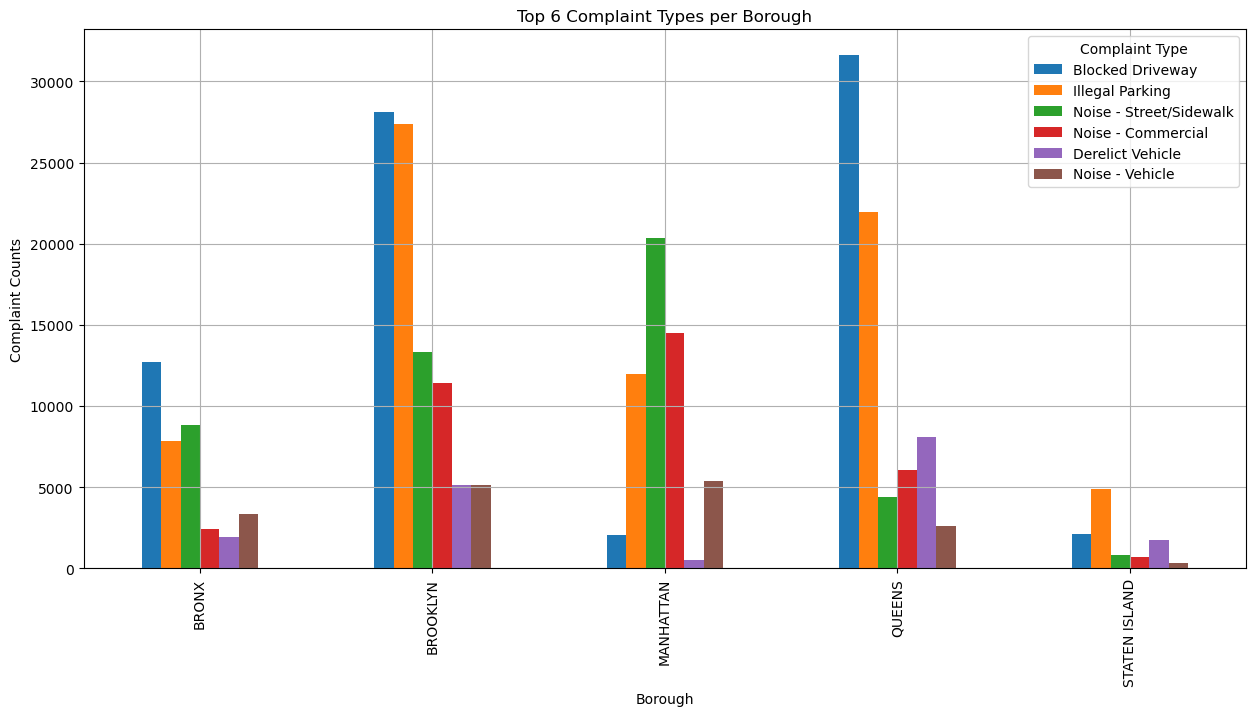

In [36]:
# Plotting the complaint distribution per borough for the top 6 complaint types
borough_complaints.plot(kind='bar', figsize=(15, 7), title='Top 6 Complaint Types per Borough', grid=True)
plt.ylabel('Complaint Counts')
plt.xlabel('Borough')
plt.show()

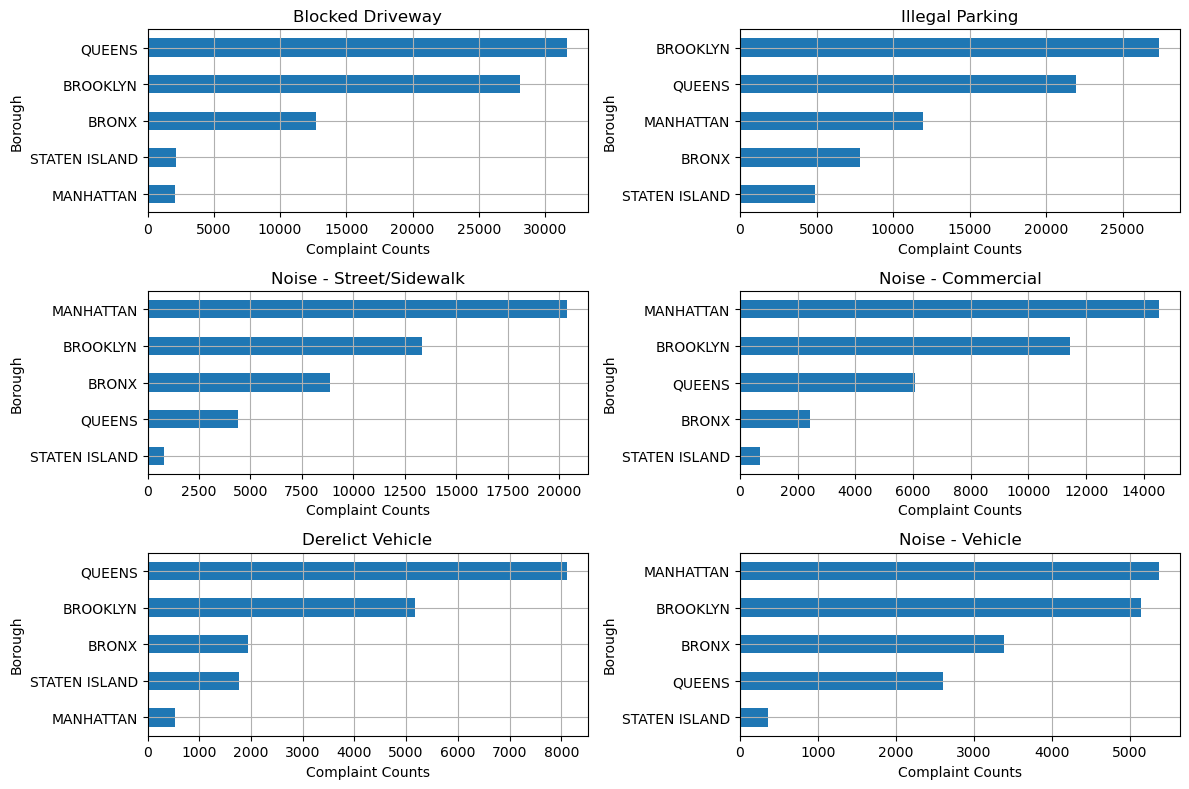

In [37]:
# Plotting Borough per Complaint Type (Top 6 Complaint Types)
col_number = 2  # Number of columns for subplots
row_number = 3  # Number of rows for subplots

# Create subplots with a 3x2 grid
fig, axes = plt.subplots(row_number, col_number, figsize=(12, 8))

# Iterating over each complaint type and plotting it per borough
for i, (label, col) in enumerate(borough_complaints.items()):  # Use items() instead of iteritems()
    ax = axes[int(i / col_number), i % col_number]
    col = col.sort_values(ascending=True)  # Sort the values in ascending order for better visualization
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)
    ax.set_xlabel('Complaint Counts')  # Set x-axis label
    ax.set_ylabel('Borough')  # Set y-axis label

# Ensure that the layout is tight and fits well in the figure
plt.tight_layout()

# Display the plot
plt.show()


In [38]:
# Similarity for Complaints per Borough
top_borough = dataset['Borough'].value_counts().keys()
complaint_per_borough = dataset.groupby(['Complaint Type', 'Borough']).size().unstack()
complaint_per_borough = complaint_per_borough[top_borough]

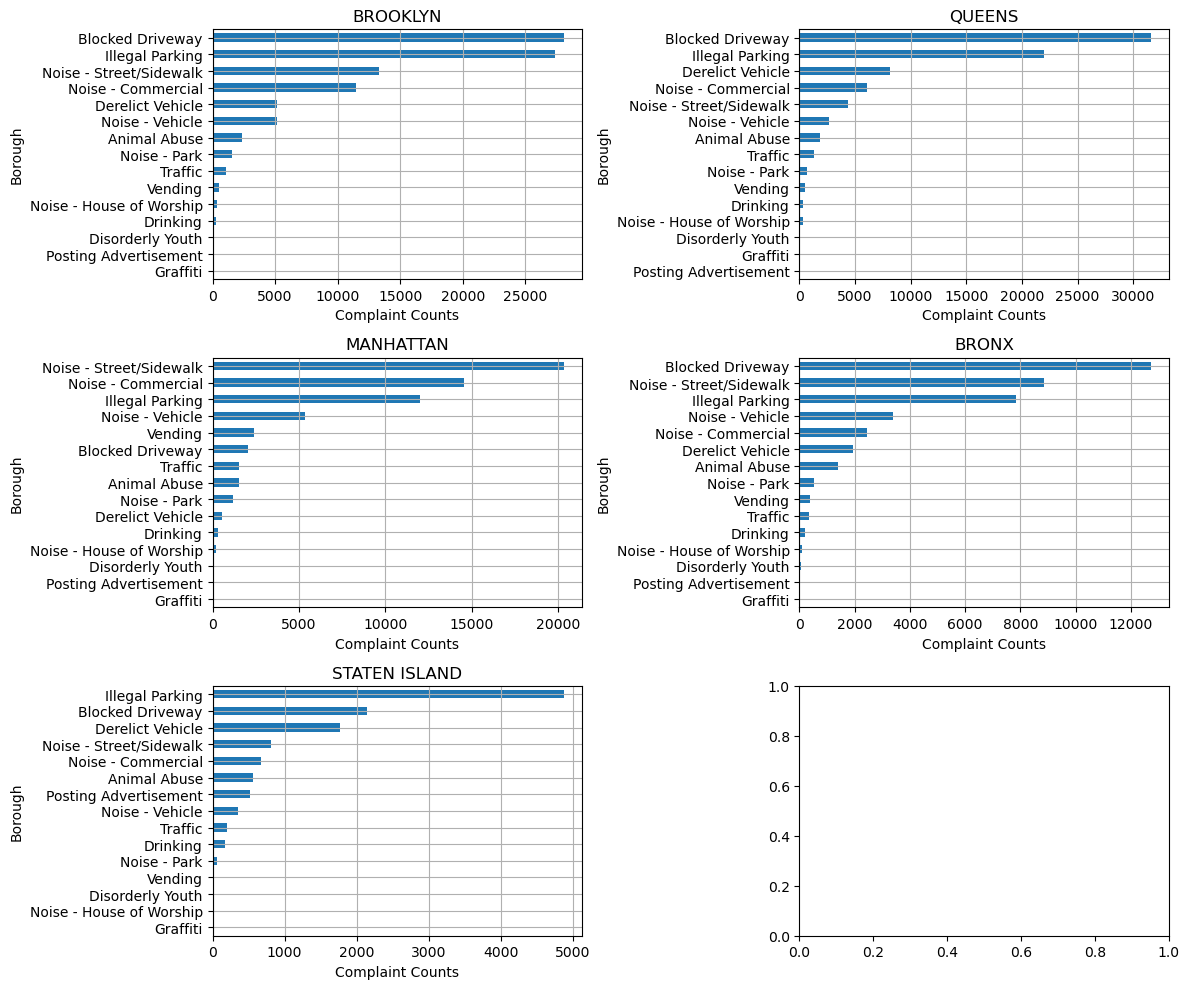

In [39]:
# Plotting Complaints per Borough
col_number = 2  # Number of columns for subplots
row_number = 3  # Number of rows for subplots

# Create subplots with a 3x2 grid
fig, axes = plt.subplots(row_number, col_number, figsize=(12, 10))

# Iterating over each borough and plotting it per complaint type
for i, (label, col) in enumerate(complaint_per_borough.items()):  # Use items() instead of iteritems()
    ax = axes[int(i / col_number), i % col_number]
    col = col.sort_values(ascending=True)  # Sort the values in ascending order for better visualization
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)  # Set the title for each subplot
    ax.set_xlabel('Complaint Counts')  # Set x-axis label
    ax.set_ylabel('Borough')  # Set y-axis label

# Ensure that the layout is tight and fits well in the figure
plt.tight_layout()

# Display the plot
plt.show()


# 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [40]:
# Convert Request_Closing_Time from days to hours for easier calculations.
# First ensure that Request_Closing_Time is a timedelta object
if 'Request_Closing_Time' in dataset.columns:
    dataset['Request_Closing_Time_in_Hours'] = dataset['Request_Closing_Time'].dt.total_seconds() / 3600 + 1

# Viewing the two columns side by side for the first 20 entries
print(dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours']].head(20))

   Request_Closing_Time  Request_Closing_Time_in_Hours
0       0 days 00:55:15                       1.920833
1       0 days 01:26:16                       2.437778
2       0 days 04:51:31                       5.858611
3       0 days 07:45:14                       8.753889
4       0 days 03:27:02                       4.450556
5       0 days 01:53:30                       2.891667
6       0 days 01:57:28                       2.957778
7       0 days 01:47:55                       2.798611
8       0 days 08:33:02                       9.550556
9       0 days 01:23:02                       2.383889
10      0 days 07:48:02                       8.800556
11      0 days 11:07:03                      12.117500
12      0 days 02:28:57                       3.482500
13      0 days 08:30:02                       9.500556
14      0 days 10:29:23                      11.489722
15      0 days 15:32:30                      16.541667
16      0 days 04:51:58                       5.866111
17      0 

In [41]:
# Ordering the complaint types based on the average ‘Request_Closing_Time’ in hours, grouped by city and complaint type
data_avg_time_in_hrs = dataset.groupby(['City', 'Complaint Type'])['Request_Closing_Time_in_Hours'].mean()
print(data_avg_time_in_hrs.head(10))

City     Complaint Type          
ARVERNE  Animal Abuse                3.153626
         Blocked Driveway            3.525968
         Derelict Vehicle            3.968220
         Disorderly Youth            4.591250
         Drinking                    1.238611
         Graffiti                    2.533333
         Illegal Parking             3.316365
         Noise - Commercial          3.287222
         Noise - House of Worship    2.562197
         Noise - Park                2.283333
Name: Request_Closing_Time_in_Hours, dtype: float64


In [42]:
# Creating a column Request_Closing_Time_in_Seconds for time in seconds
dataset['Request_Closing_Time_in_Seconds'] = dataset['Request_Closing_Time'].dt.total_seconds()

# Viewing the three columns side by side
print(dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours', 'Request_Closing_Time_in_Seconds']].head())


  Request_Closing_Time  Request_Closing_Time_in_Hours  \
0      0 days 00:55:15                       1.920833   
1      0 days 01:26:16                       2.437778   
2      0 days 04:51:31                       5.858611   
3      0 days 07:45:14                       8.753889   
4      0 days 03:27:02                       4.450556   

   Request_Closing_Time_in_Seconds  
0                           3315.0  
1                           5176.0  
2                          17491.0  
3                          27914.0  
4                          12422.0  


In [43]:
# Order the complaint types based on the average ‘Request_Closing_Time’ in seconds, grouped by city and complaint type
data_avg_in_seconds = dataset.groupby(['City', 'Complaint Type'])['Request_Closing_Time_in_Seconds'].mean()
print(data_avg_in_seconds.head(10))

City     Complaint Type          
ARVERNE  Animal Abuse                 7753.052632
         Blocked Driveway             9093.485714
         Derelict Vehicle            10685.592593
         Disorderly Youth            12928.500000
         Drinking                      859.000000
         Graffiti                     5520.000000
         Illegal Parking              8338.913793
         Noise - Commercial           8234.000000
         Noise - House of Worship     5623.909091
         Noise - Park                 4620.000000
Name: Request_Closing_Time_in_Seconds, dtype: float64


In [44]:
# Analyze the Request_Closing_Time
print(dataset['Request_Closing_Time'].describe())

count                       291107
mean     0 days 04:18:32.132665995
std      0 days 06:03:45.509089128
min                0 days 00:01:00
25%                0 days 01:16:30
50%                0 days 02:42:38
75%                0 days 05:20:24
max               24 days 16:52:22
Name: Request_Closing_Time, dtype: object


In [45]:
# Calculate mean and standard deviation
mean_hrs = dataset['Request_Closing_Time_in_Hours'].mean()
std_hrs = dataset['Request_Closing_Time_in_Hours'].std()
mean_seconds = dataset['Request_Closing_Time_in_Seconds'].mean()
std_seconds = dataset['Request_Closing_Time_in_Seconds'].std()

print('The mean hours is {0:.2f} hours and mean seconds is {1:.2f} seconds'.format(mean_hrs, mean_seconds))
print('The standard hours is {0:.2f} hours and standard seconds is {1:.2f} seconds'.format(std_hrs, std_seconds))


The mean hours is 5.31 hours and mean seconds is 15512.13 seconds
The standard hours is 6.06 hours and standard seconds is 21825.51 seconds


In [46]:
# Analyze Complaint Types based on Months using Created Date
# Separate months from Created Date column
dataset['Year-Month'] = dataset['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

# Viewing the months that we have in our dataset
print(dataset['Year-Month'].unique())

['2015-12' '2015-11' '2015-10' '2015-09' '2015-08' '2015-07' '2015-06'
 '2015-05' '2015-04' '2015-03']


In [47]:
# Plotting incident counts on a monthly basis
monthly_incidents = dataset.groupby('Year-Month').size().plot(
    figsize=(12, 5),
    title='Incident Counts on a Monthly Basis',
    ylabel='Counts'
)

# Plotting Borough based on Year-Month
dataset.groupby(['Year-Month', 'Borough']).size().unstack().plot(figsize=(15, 7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Incident Counts by Borough per Month')
plt.xlabel('Year-Month')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

In [48]:
# Plotting Year-Month based on Borough
dataset.groupby(['Borough', 'Year-Month']).size().unstack().plot(figsize=(15, 7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Incident Counts by Year-Month and Borough')
plt.xlabel('Borough')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

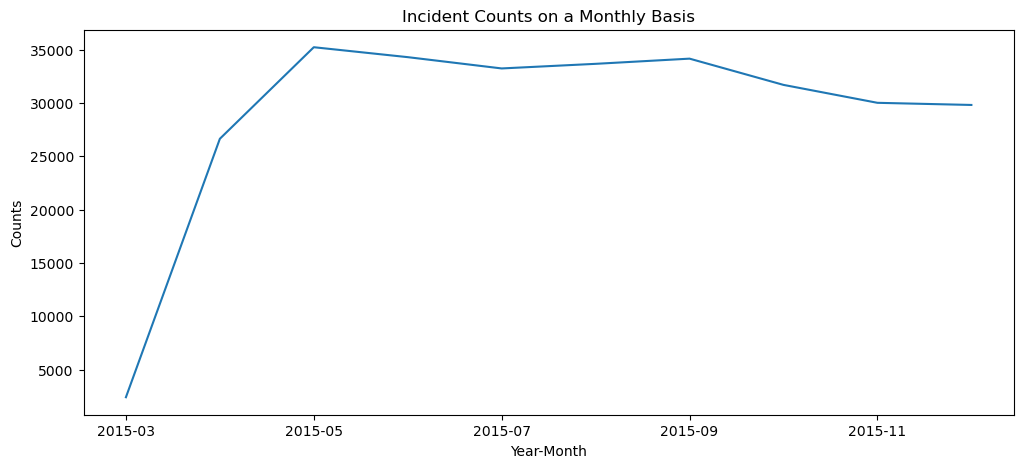

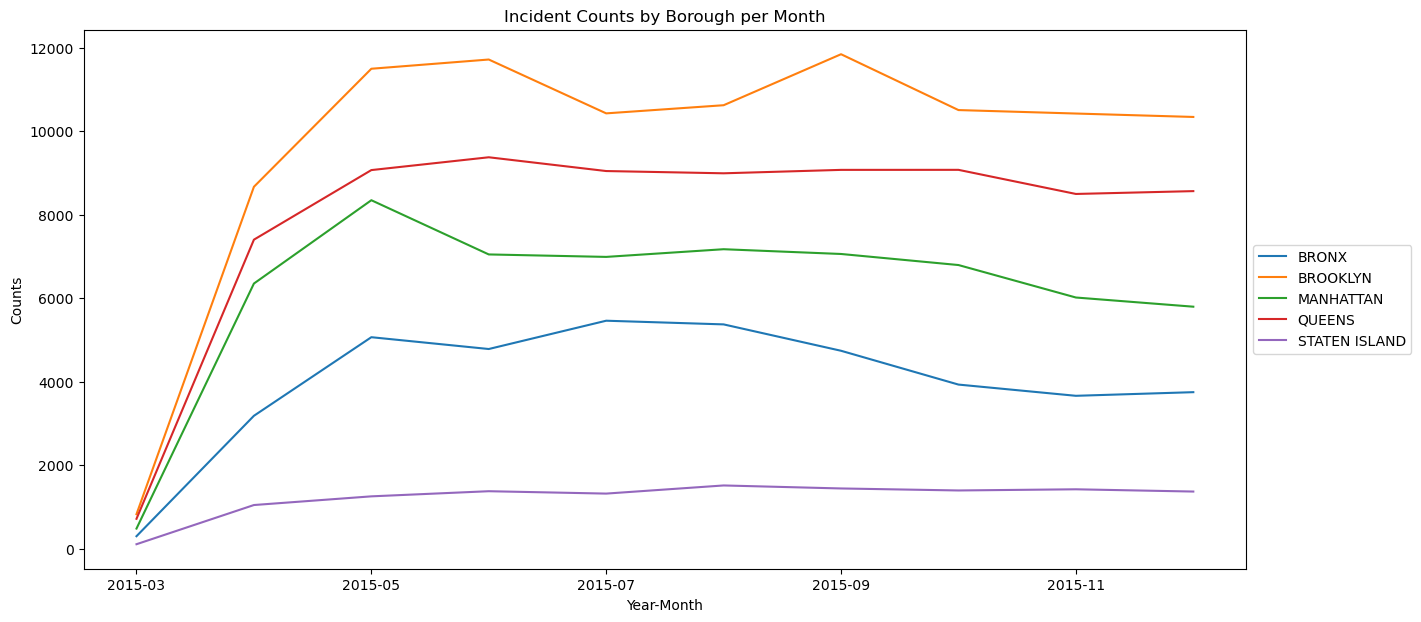

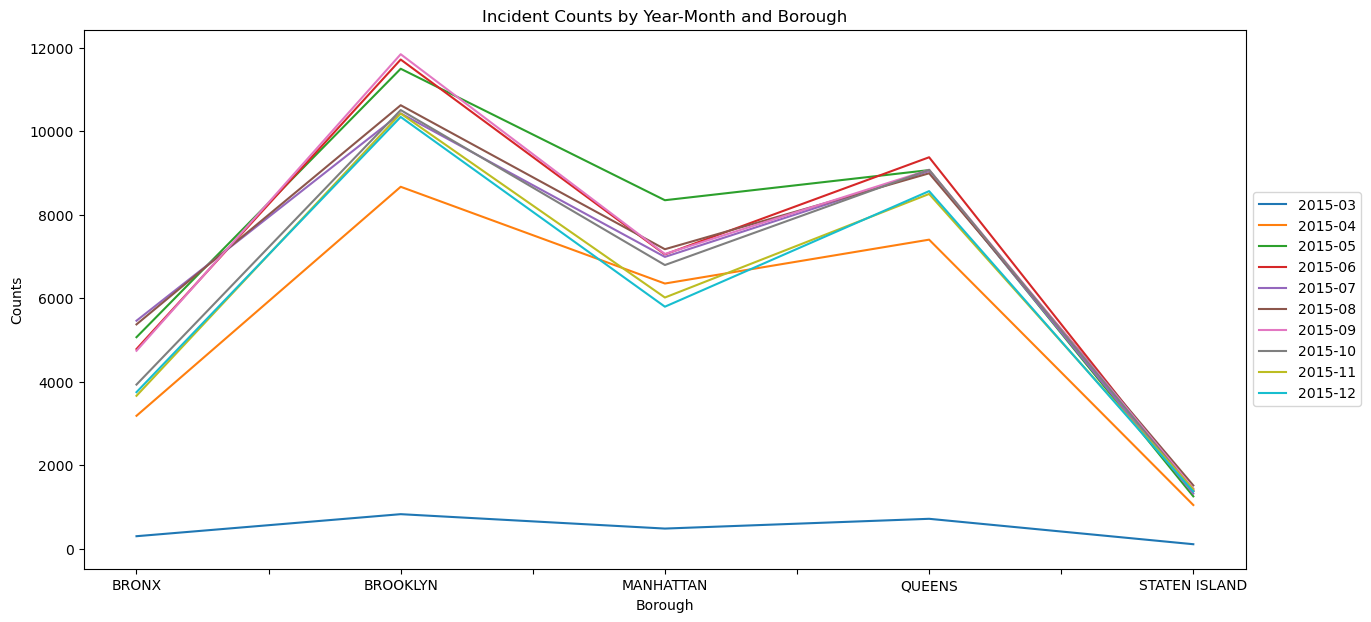

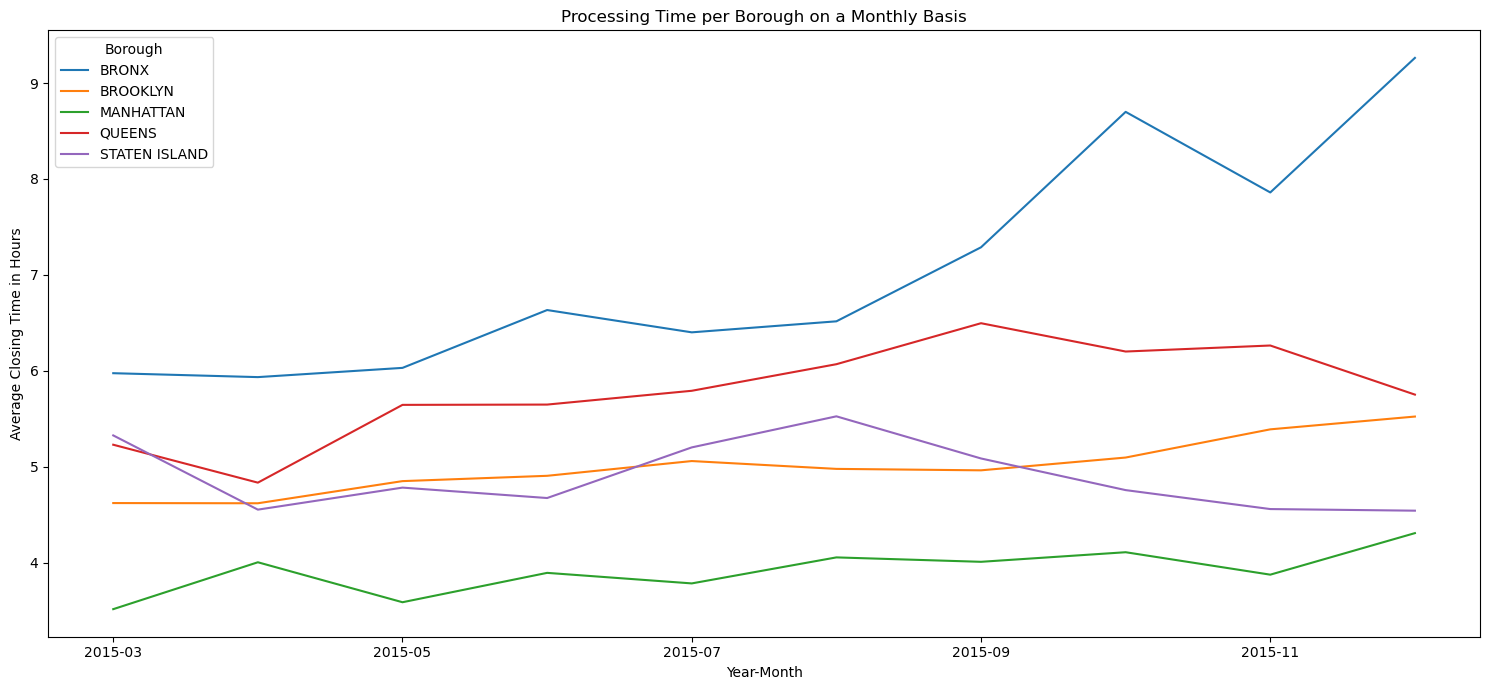

In [49]:
# Processing time per Borough on a monthly basis
dataset.groupby(['Year-Month', 'Borough'])['Request_Closing_Time_in_Hours'].mean().unstack().plot(
    figsize=(15, 7),
    title='Processing Time per Borough on a Monthly Basis'
)
plt.xlabel('Year-Month')
plt.ylabel('Average Closing Time in Hours')
plt.legend(title='Borough')
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# 5. Perform a statistical test for the following:



In [50]:

# a. Whether the average response time across complaint types is similar or not (overall)
# Null Hypothesis (H0): The average response time is similar across all complaint types.
# Alternate Hypothesis (H1): The average response time is not similar across all complaint types.
# Calculate average response time in seconds for different complaint types
avg_response_time = dataset.groupby(['Complaint Type'])['Request_Closing_Time_in_Seconds'].mean().sort_values(ascending=True)


In [51]:
# Log of response times to normalize
data = {}
for complaint in dataset['Complaint Type'].unique():
    data[complaint] = np.log(dataset[dataset['Complaint Type'] == complaint]['Request_Closing_Time_in_Seconds'])


In [52]:
from scipy.stats import f_oneway, chi2_contingency, chi2
# Using ANOVA test for the top 5 complaints
top_complaints = list(data.keys())[:5]  # Taking top 5 complaints
stat, p = f_oneway(*[data[complaint] for complaint in top_complaints])

print('ANOVA Statistics= %.3f, p = %.3f' % (stat, p))

# Interpretation of results
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('We have different distributions (reject H0)')


ANOVA Statistics= 2452.471, p = 0.000
We have different distributions (reject H0)


In [53]:
# b. Are the type of complaint or service requested and location related?
# Null Hypothesis (H0): The type of complaint and location are independent.
# Alternate Hypothesis (H1): The type of complaint and location are not independent.

# Creating a contingency table
city_type = pd.crosstab(dataset['City'], dataset['Complaint Type'])
print(city_type.head())  # Viewing first 5 entries of the contingency table

Complaint Type  Animal Abuse  Blocked Driveway  Derelict Vehicle  \
City                                                               
ARVERNE                   38                35                27   
ASTORIA                  125              2618               351   
Astoria                    0               116                12   
BAYSIDE                   37               376               198   
BELLEROSE                  7                95                89   

Complaint Type  Disorderly Youth  Drinking  Graffiti  Illegal Parking  \
City                                                                    
ARVERNE                        2         1         1               58   
ASTORIA                        3        35         4             1065   
Astoria                        0         0         0              213   
BAYSIDE                        1         1         3              511   
BELLEROSE                      2         1         0              105   

Complaint T

In [54]:
# Performing Chi-square test
stat, p, dof, expected = chi2_contingency(city_type)
print('Degrees of Freedom:', dof)
print('P-Value:', p)
print('Expected frequencies:\n', expected)

Degrees of Freedom: 728
P-Value: 0.0
Expected frequencies:
 [[5.69280711e+00 5.63664357e+01 1.28690962e+01 2.09510592e-01
  9.33608604e-01 8.30691120e-02 5.44146791e+01 2.58352290e+01
  6.76314895e-01 2.88683542e+00 3.51000079e+01 1.24000866e+01
  4.75625801e-01 3.28306774e+00 2.77362619e+00]
 [1.66368298e+02 1.64726957e+03 3.76090317e+02 6.12280021e+00
  2.72840571e+01 2.42763657e+00 1.59023086e+03 7.55016458e+02
  1.97648287e+01 8.43657418e+01 1.02577313e+03 3.62383838e+02
  1.38998306e+01 9.59453534e+01 8.10572813e+01]
 [1.90469621e+01 1.88590505e+02 4.30573500e+01 7.00979365e-01
  3.12366243e+00 2.77932169e-01 1.82060328e+02 8.64393642e+01
  2.26281058e+00 9.65875778e+00 1.17437410e+02 4.14881401e+01
  1.59134614e+00 1.09844696e+01 9.27998296e+00]
 [3.22947095e+01 3.19760995e+02 7.30050600e+01 1.18853205e+00
  5.29626563e+00 4.71242533e-01 3.08688881e+02 1.46560598e+02
  3.83666487e+00 1.63767206e+01 1.99118736e+02 7.03444163e+01
  2.69817627e+00 1.86245058e+01 1.57344963e+01]
 [9.

In [55]:
# Interpretation of test statistics
prob = 0.95  # Confidence level
critical_value = chi2.ppf(prob, dof)
print('Probability = {}, Critical Value = {}, Test statistic = {}'.format(prob, critical_value, stat))

Probability = 0.95, Critical Value = 791.8799091140163, Test statistic = 105247.14233091185


In [56]:
# Determining dependence based on test statistics
if abs(stat) >= critical_value:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')

Dependent (Reject H0 or Null Hypothesis)


In [57]:
# Interpreting the P-Value
alpha = 1 - prob
print('Significance: %.3f, P-Value: %.2f' % (alpha, p))
if p <= alpha:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')

Significance: 0.050, P-Value: 0.00
Dependent (Reject H0 or Null Hypothesis)


### Conclusion
The analysis of response imes to complaints across different request types revealed important insights regarding the efficiency of complaint processing. By applying appropriate statistical tests, we were able to evaluate whether the average response times were similar across various complaint types. The results from the ANOVA indicated significant differences in response times, leading us to reject the null hypothesis that response times would be similar. This highlights the need for increased attention to certain complaint categories in order to improve customer service and satisfaction.

Furthermore, our analysis examined the relationship between complaint types and locations. Using the chi-square test, we found that there is a dependency between complaint types and locations. This indicates that certain types of complaints are more prevalent in specific areas, which can guide service improvement policies and resource allocation.

These findings emphasize the importance of a data-driven approach to optimize operations and complaint management. By leveraging these analyses, decision-makers can better target necessary interventions to enhance response times and, consequently, citizen satisfaction. Future studies could further explore these analyses by investigating other factors influencing response times and assessing the impact of implemented interventions.
